# Kinematics

## Forward kinematics

joint0_angle = 91.0 degrees
joint1_angle = 104.7 degrees
End Effector at x = -37.8 y = 14.6


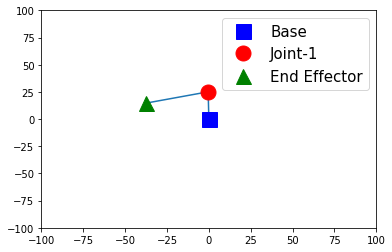

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to compute the arm configuration
def compute_arm_config(link1_length, link2_length, joint0_angle, joint1_angle):
    
    def rotate(vector, angle_rad):
        """Rotate 2D `vector` by `angle_rad`"""
        x = vector[0]
        y = vector[1]
        cos_a = np.cos(angle_rad)
        sin_a = np.sin(angle_rad)
        xp = x * cos_a - y * sin_a
        yp = x * sin_a + y * sin_a
        return xp, yp

    
    joint1_x, joint1_y = rotate([link1_length, 0], joint0_angle)
    joint2_x, joint2_y = rotate([link2_length, 0], joint0_angle + joint1_angle)
    p2_x, p2_y = joint1_x + joint2_x, joint1_y + joint2_y
    return joint1_x, joint1_y, p2_x, p2_y

if True:
    link1_length = np.random.random() * 30 + 20
    link2_length = np.random.random() * 30 + 20
    joint0_angle = np.random.random() * 2 * np.pi
    joint1_angle = np.random.random() * 2 * np.pi
else:
    link1_length = 40
    link2_length = 20
    joint0_angle = np.pi / 2
    joint1_angle = -np.pi / 2
    
joint1_x, joint1_y, p2_x, p2_y = compute_arm_config(link1_length, link2_length, joint0_angle, joint1_angle)

print("joint0_angle =", round(joint0_angle * 180 / np.pi, 1), "degrees") 
print("joint1_angle =", round(joint1_angle * 180 / np.pi, 1),"degrees") 
print("End Effector at x =", round(p2_x, 1),"y =", round(p2_y, 1))
base_x = 0
base_y = 0
# Plot the links
plt.plot([base_x, joint1_x, p2_x], [base_y, joint1_y, p2_y])
# Plot the base as a blue square
plt.plot(base_x, base_y, 'bs', markersize=15, label='Base')
# Plot Joint-1 as a red circle
plt.plot(joint1_x, joint1_y, 'ro', markersize=15, label='Joint-1')
# Plot End Effector as a green triangle
plt.plot(p2_x, p2_y, 'g^', markersize=15, label='End Effector')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.legend(fontsize=15)
plt.show()

## Rotation with Sympy

In [22]:
from sympy import symbols, cos, sin, pi, simplify
from sympy.matrices import Matrix
import numpy as np

### Create symbols for joint variables which are commonly represented by "q"
### Joint variable "q" is equal to "ϴ" or "d" depending if the joint is revolute or prismatic
q1, q2, q3, q4 = symbols('q1:5') # remember slices do not include the end value 

# unrelated symbols can be defined like this:
A, R, O, C = symbols('A R O C')

# Conversion Factors
rtd = 180./np.pi # radians to degrees
dtr = np.pi/180. # degrees to radians

R_x = Matrix([[ 1,              0,        0],
              [ 0,        cos(q1), -sin(q1)],
              [ 0,        sin(q1),  cos(q1)]])

R_y = Matrix([[ cos(q2),        0,  sin(q2)],
              [       0,        1,        0],
              [-sin(q2),        0,  cos(q2)]])

R_z = Matrix([[ cos(q3), -sin(q3),        0],
              [ sin(q3),  cos(q3),        0],
              [ 0,              0,        1]])


print("Rotation about the X-axis by 45-degrees")
print(R_x.evalf(subs={q1: 45*dtr}))
print("Rotation about the y-axis by 45-degrees")
print(R_y.evalf(subs={q2: 45*dtr}))
print("Rotation about the Z-axis by 30-degrees")
print(R_z.evalf(subs={q3: 30*dtr}))

q1 q4
Rotation about the X-axis by 45-degrees
Matrix([[1.00000000000000, 0, 0], [0, 0.707106781186548, -0.707106781186547], [0, 0.707106781186547, 0.707106781186548]])
Rotation about the y-axis by 45-degrees
Matrix([[0.707106781186548, 0, 0.707106781186547], [0, 1.00000000000000, 0], [-0.707106781186547, 0, 0.707106781186548]])
Rotation about the Z-axis by 30-degrees
Matrix([[0.866025403784439, -0.500000000000000, 0], [0.500000000000000, 0.866025403784439, 0], [0, 0, 1.00000000000000]])


In [29]:
# Intrinsic rotation sequence about the Y and then Z axes

import numpy as np
from sympy import symbols, cos, sin, pi, sqrt
from sympy.matrices import Matrix


### Create symbols for joint variables
q1, q2 = symbols('q1:3')
dtr = np.pi/180. # degrees to radians

# Create a symbolic matrix representing an intrinsic sequence of rotations 
  # about the Y and then Z axes. Let the rotation about the Y axis be described
  # by q1 and the rotation about Z by q2. 
####### TO DO ########
# Replace R_y and R_z with the appropriate (symbolic) elementary rotation matrices 
  # and then compute YZ_intrinsic. 
R_y = Matrix([[ cos(q1),        0,  sin(q1)],
              [       0,        1,        0],
              [-sin(q1),        0,  cos(q1)]])

R_z = Matrix([[ cos(q2), -sin(q2),        0],
              [ sin(q2),  cos(q2),        0],
              [ 0,              0,        1]])
YZ_intrinsic_sym = R_y * R_z

print(YZ_intrinsic_sym)

####### TO DO ########
# Numerically evaluate YZ_intrinsic assuming:
   # q1 = 45 degrees and q2 = 60 degrees. 
   # NOTE: Trigonometric functions in Python assume the input is in radians!  

YZ_intrinsic_num = YZ_intrinsic_sym.evalf(subs={q1: 45 * dtr, q2: 60 * dtr})
print(YZ_intrinsic_num)


Matrix([[cos(q1)*cos(q2), -sin(q2)*cos(q1), sin(q1)], [sin(q2), cos(q2), 0], [-sin(q1)*cos(q2), sin(q1)*sin(q2), cos(q1)]])
Matrix([[0.353553390593274, -0.612372435695794, 0.707106781186547], [0.866025403784439, 0.500000000000000, 0], [-0.353553390593274, 0.612372435695794, 0.707106781186548]])


In [30]:
# Extrinsic rotation about the Z and then Y axes.
## Note that code is the same as above(because order of rotation is different)

from sympy import symbols, cos, sin, pi, sqrt
from sympy.matrices import Matrix
import numpy as np

dtr = np.pi/180. # degrees to radians

### Create symbols for joint variables
q1, q2 = symbols('q1:3')

# Create a symbolic matrix representing an extrinsic sequence of rotations 
  # about the Z and then Y axes. Let the rotation about the Y axis be described
  # by q1 and the rotation about Z by q2. 
####### TO DO ########
# Replace R_y and R_z with the appropriate (symbolic) elementary rotation matrices 
  # and then compute ZY_extrinsic. 
R_y = Matrix([[ cos(q1),        0,  sin(q1)],
              [       0,        1,        0],
              [-sin(q1),        0,  cos(q1)]])

R_z = Matrix([[ cos(q2), -sin(q2),        0],
              [ sin(q2),  cos(q2),        0],
              [ 0,              0,        1]])
ZY_extrinsic_sym = R_y * R_z
ZY_extrinsic_num = ZY_extrinsic_sym.evalf(subs={q1: 45 * dtr, q2: 60 * dtr})


In [36]:
import numpy as np
from sympy.matrices import Matrix
from sympy import symbols, atan2, sqrt


# Fixed Axis X-Y-Z Rotation Matrix
rtd = 180./np.pi # radians to degrees

R_XYZ = Matrix([[ 0.353553390593274, -0.306186217847897, 0.883883476483184],
            [ 0.353553390593274,  0.918558653543692, 0.176776695296637],
            [-0.866025403784439,               0.25, 0.433012701892219]])

######## TO DO ##########
# Calculate the Euler angles that produces a rotation equivalent to R (above)
# NOTE: Be sure your answer has units of DEGREES!
beta = rtd * atan2( -R_XYZ[2,0], sqrt(R_XYZ[0,0] * R_XYZ[0,0] + R_XYZ[1,0] * R_XYZ[1,0]))
gamma  = rtd * atan2(R_XYZ[2,1], R_XYZ[2,2])
alpha = rtd * atan2(R_XYZ[1,0], R_XYZ[0,0])


print(alpha)
print(beta)
print(gamma)


60.0000000000000
30.0000000000000
45.0000000000000


In [46]:
# Homogeneous Transforms and their Inverse

from sympy import symbols, cos, sin, pi, simplify, sqrt, atan2
from sympy.matrices import Matrix
import numpy as np

dtr = np.pi/180. # degrees to radians

###############################################################
# Problem Statement:
  # Let P be a vector expressed in frame {B} with (x,y,z)
  # coordinates = (15.0, 0.0, 42.0)
  # Rotate P about the Y-axis by angle = 110 degrees. 
  # Then translate the vector 1 unit
  # in the X-axis and 30 units in the Z-axis. 
  # Print the new (x, y, z) coordinates of P after the transformation.  
###############################################################
#### Create symbols for joint variables
q1 = symbols('q1')
gamma  = symbols('gamma')

R_y = Matrix([[ cos(q1),        0,  sin(q1),  1],
              [       0,        1,        0,  0],
              [-sin(q1),        0,  cos(q1), 30],
              [       0,        0,        0,  1]
             ])

T = R_y.evalf(subs={q1: 110 * dtr})

#### TO DO ####
# Replace P and T with appropriate expressions and calculate new coordinates of P in {A}. 
P = Matrix([ [15], [0], [42], [1] ])
print(P.shape)
P_new = T * P

print(P_new)


Matrix([[-0.342020143325669, 0, 0.939692620785908, 1.00000000000000], [0, 1.00000000000000, 0, 0], [-0.939692620785908, 0, -0.342020143325669, 30.0000000000000], [0, 0, 0, 1.00000000000000]])
(4, 1)
Matrix([[35.3367879231231], [0], [1.53976466853329], [1.00000000000000]])


In [ ]:
# Composition of Homogeneous Transforms



from sympy import symbols, cos, sin, pi, sqrt, simplify
from sympy.matrices import Matrix

### Create symbols for joint variables
# The numbers 1 to 4 correspond to each rotation in the order specified to you.
q1, q2, q3, q4 = symbols('q1:5')

### Define functions for Rotation Matrices about x, y, and z given specific angle.

def rot_x(q):
    R_x = 0
    
    return R_x
    
def rot_y(q):              
    R_y = 0
    
    return R_y

def rot_z(q):    
    R_z = 0
    
    return R_z
              
### Define rotations between frames

# Initial Rotation Matrix for Frame A
Ra = Matrix([[1, 0, 0],
             [0, 1, 0],
             [0, 0, 1]])

# Rotations performed on individual Frames for A->B->E
Rb_a = 0
Re_b = 0

# Rotations performed on individual Frames for A->C->D->E
Rc_a = 0
Rd_c = 0
Re_d = 0

### Define Translations between frames.

tb_a = 0
te_b = 0
tc_a = 0
td_c = 0
te_d = 0

### Define homogenous transformation matrices
# HINT: Check out sympy's documentation for functions row_join and col_join
Ta = 0

Tb_a = 0

Te_b = 0

Tc_a = 0

Td_c = 0

Te_d = 0         

### Composition of Transformations
Te_a_1 = simplify(Ta * Tb_a * Te_b)

Te_a_2 = simplify(Ta * Tc_a * Td_c * Te_d)

### Calculate orientation and position for E
E_1 = Te_a_1.evalf(subs={q1: 0, q2: 0}, chop = True)

E_2 = Te_a_2.evalf(subs={q3: 0, q4: 0}, chop = True)

print("Transformation Matrix for A->B->E:")
print(E_1)

print("Transformation Matrix for A->C->D->E:")
print(E_2)


